In [62]:
import csv
from dataclasses import replace 
import pandas as pd
import matplotlib.pyplot as plt
import time
import datetime
import math

df=pd.read_csv("CAC-40-Historical-Data.csv")
#df["Date"]=datetime.datetime.strptime(df["Date"], "%M/%d/%Y")
df["Date"]=pd.to_datetime(df["Date"])
df["Price"]=df["Price"].str.replace(r',','')

df["Price"]=df["Price"].astype(float)
df


TypeError: cannot convert the series to <class 'float'>

In [44]:

df1=df.resample("M",on='Date').mean()
df1

/tmp/ipykernel_8526/669067305.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df1=df.resample("M",on='Date').mean()


,Price
Date,
2011-09-30,2981.960000
2011-10-31,3191.394000
2011-11-30,3042.077500
2011-12-31,3101.637500
2012-01-31,3280.406000
...,...
2022-05-31,6381.466000
2022-06-30,6018.572500
2022-07-31,6241.360000


In [64]:

df['SMA30']=df['Price'].rolling(30).mean()
df1.isna().sum()


Price    0
dtype: int64

<AxesSubplot:xlabel='Date'>

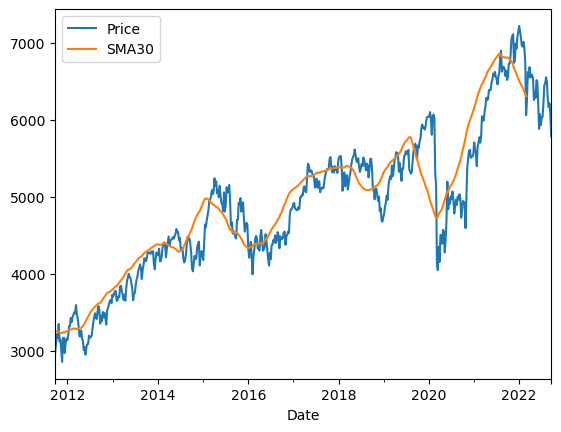

In [55]:
ax=plt.gca()

df.plot(kind='line',x='Date',y='Price', ax=ax)
df.plot(kind='line',x='Date',y='SMA30', ax=ax)



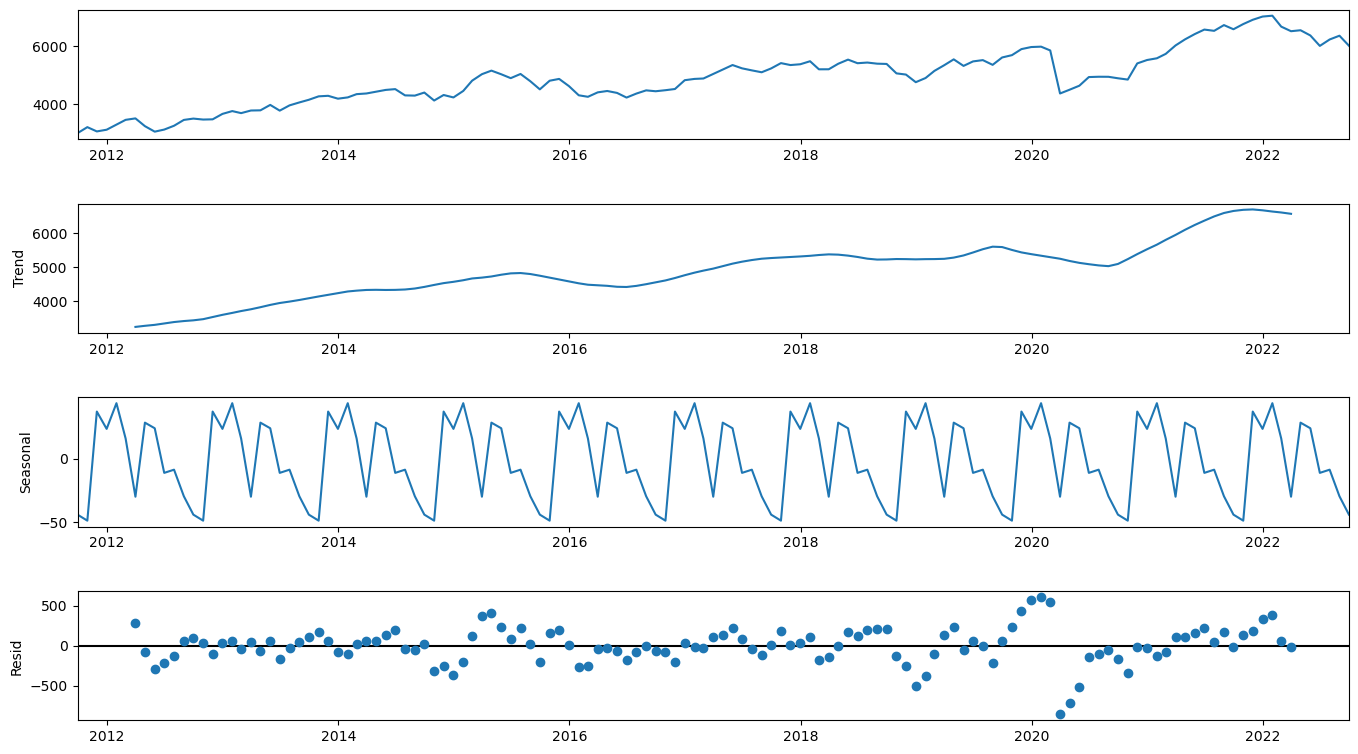

In [66]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomp= seasonal_decompose(df1)
fig1=decomp.plot()
fig1.set_size_inches(15,8)

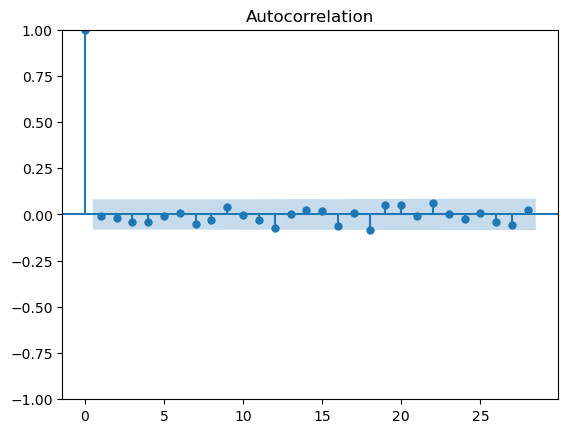

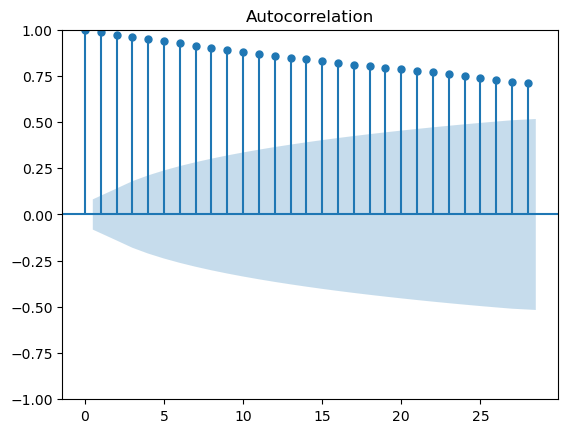

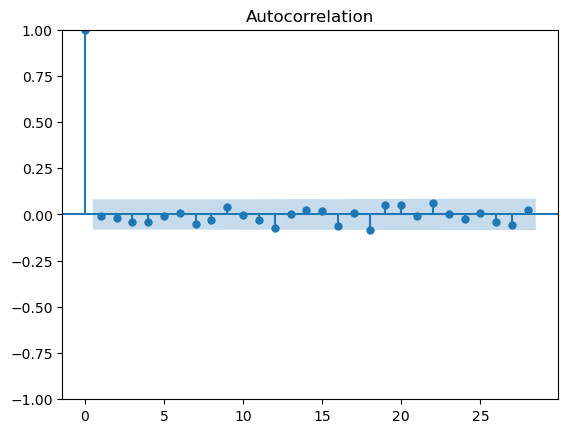

In [71]:

from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df["Price"])

f=plt.figure()
ax1=f.add_subplot()
plot_acf(df['Price'].diff().dropna(),ax=ax1)


In [72]:
from statsmodels.tsa.arima_model import ARIMA

arima_model=ARIMA(df['Price'],order=(1,1,2))
model=arima_model.fit()
print(model.summary())

NameError: name 'order' is not defined